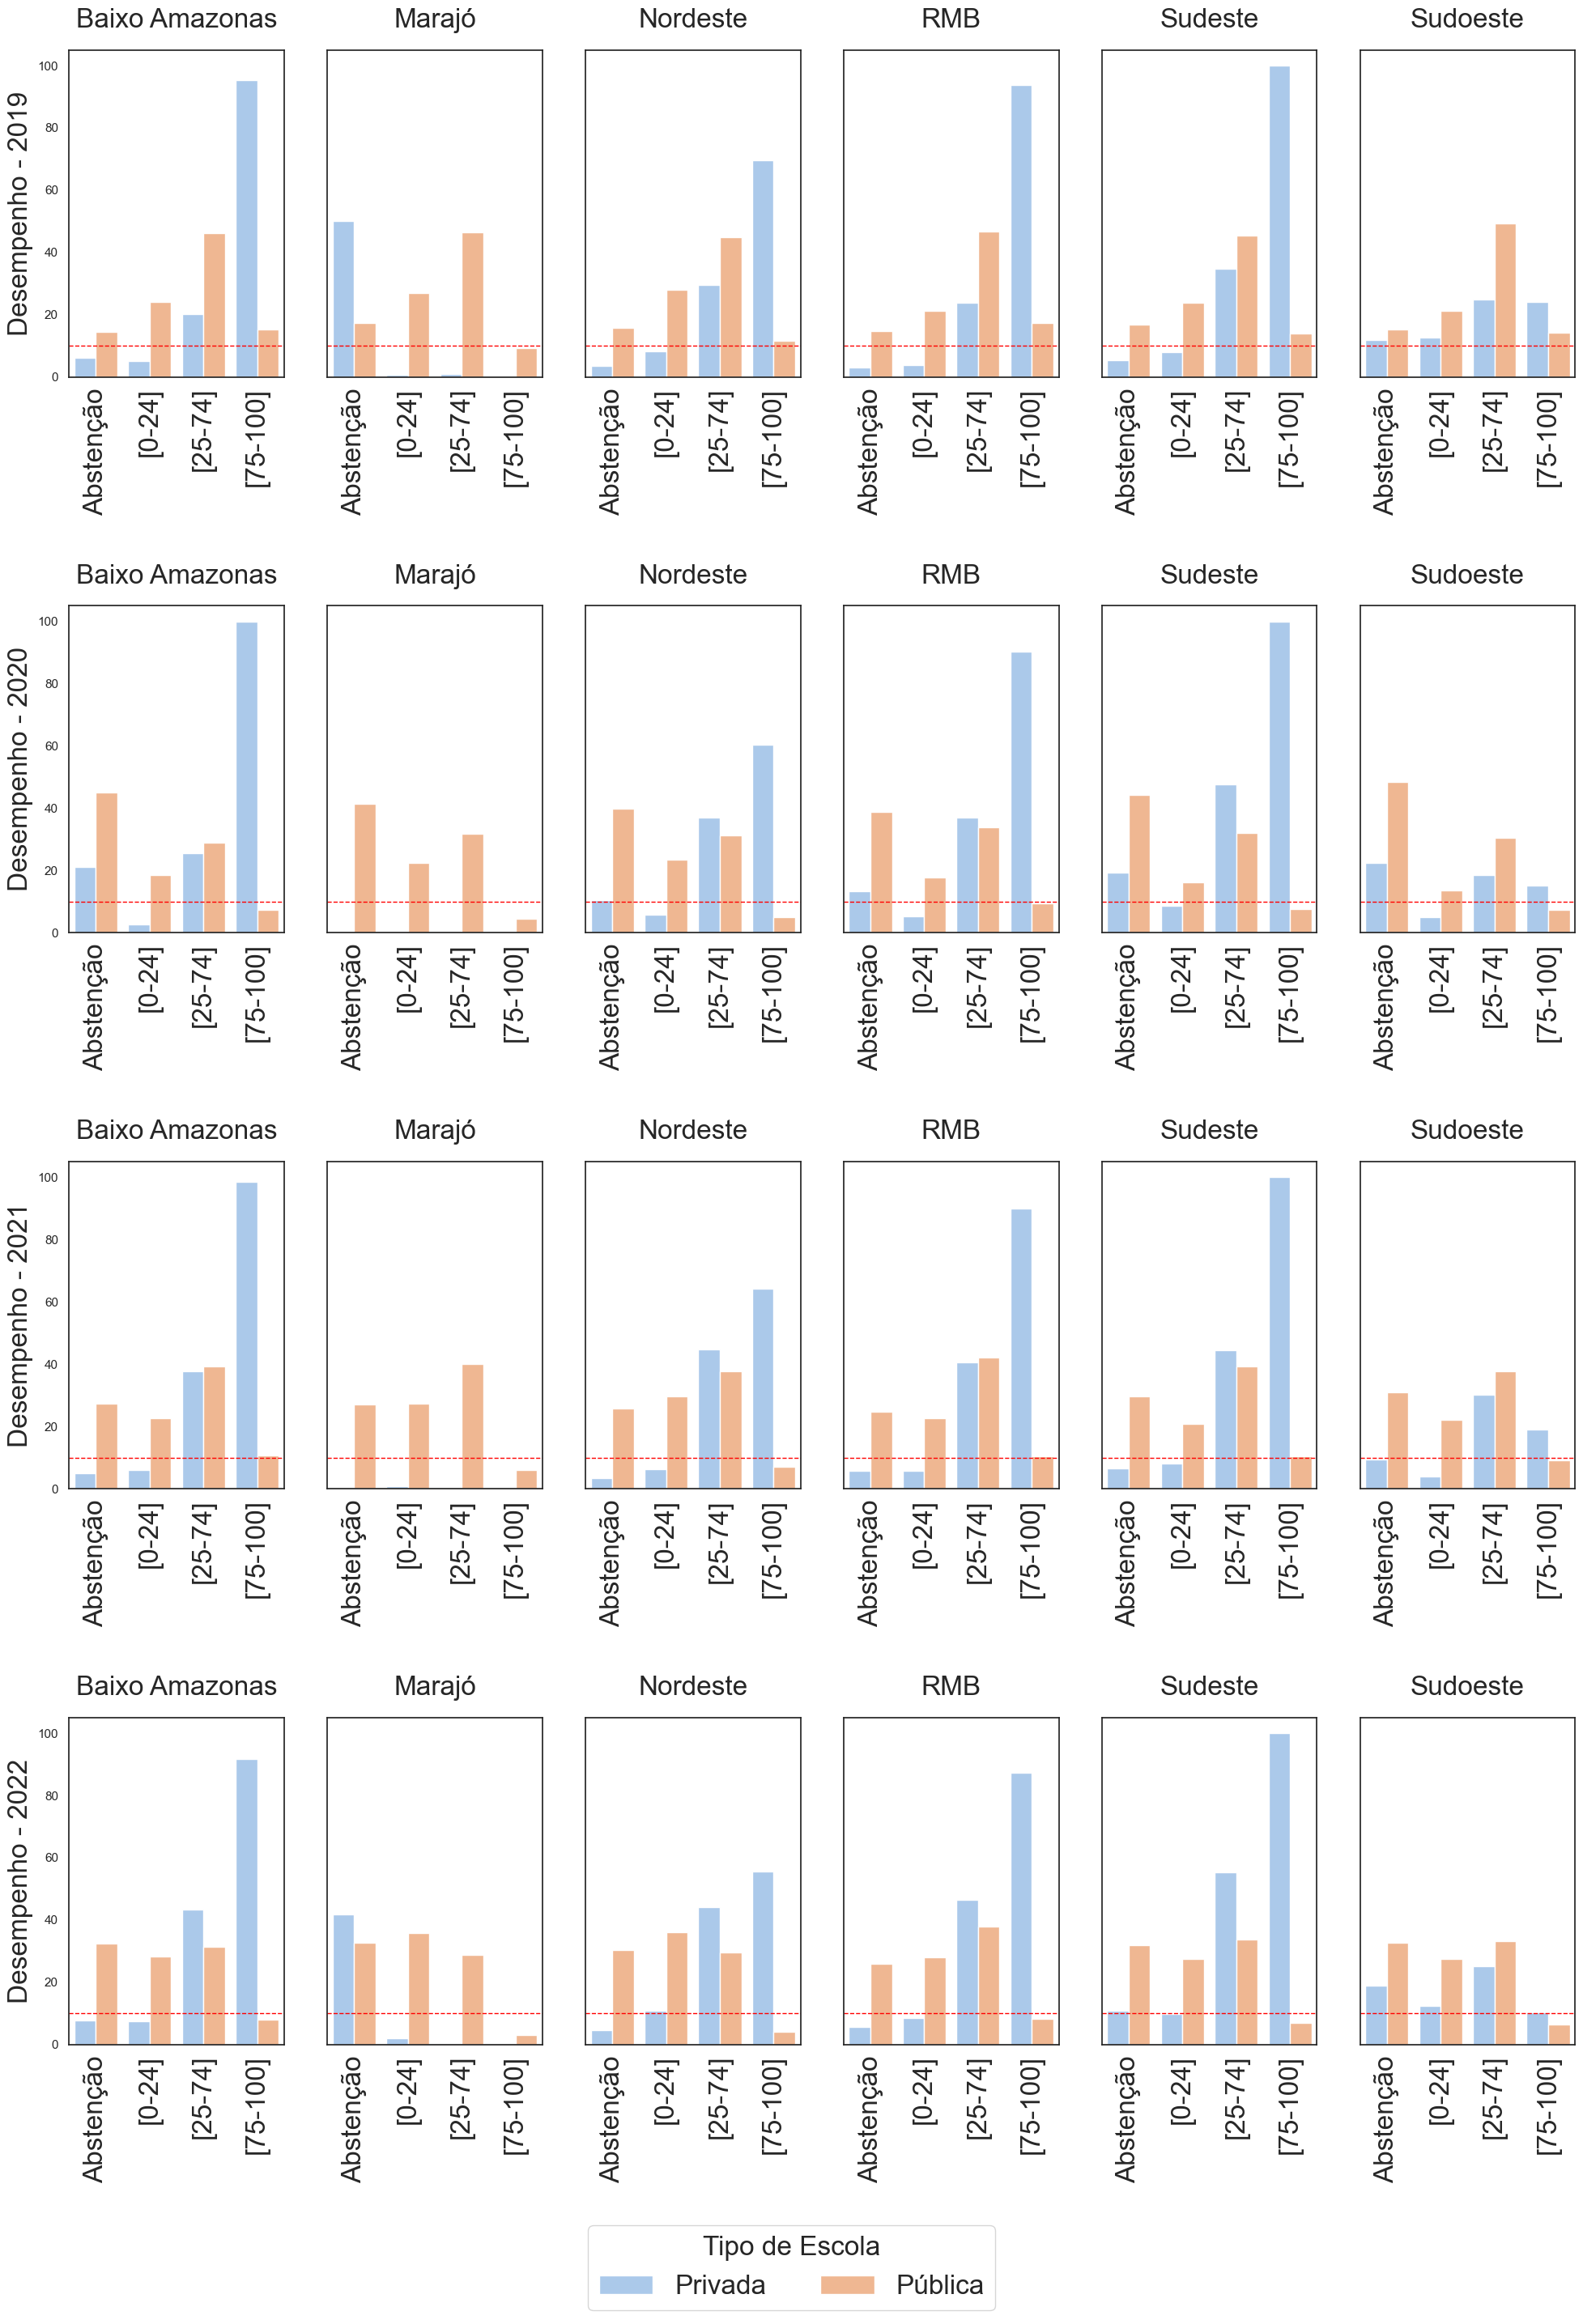

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados dos anos
arquivos = {
    "2019": "data/group 2019.csv",
    "2020": "data/group 2020.csv",
    "2021": "data/group 2021.csv",
    "2022": "data/group 2022.csv"
}

traducao_meso = {
    "Metripolitan Area": "RMB",
    "Notheastern": "Nordeste",
    "Southwest": "Sudoeste",
    "Sultheast": "Sudeste",
    "Marajó": "Marajó",
    "Lower Amazon": "Baixo Amazonas"
}

traducao_escola = {
    "Public": "Pública",
    "Private": "Privada"
}

# Lê e prepara os dados
dados_anos = {}
for ano, caminho in arquivos.items():
    df = pd.read_csv(caminho)
    df.replace({',': '.'}, regex=True, inplace=True)
    df['DESEMPENHO'] = df['DESEMPENHO'].astype(float)
    df['TD_ADM'] = df['TD_ADM'].replace(traducao_escola)
    df['MESSOREGIAO'] = df['MESSOREGIAO'].replace(traducao_meso)
    
    dados_anos[ano] = df

# Obter todas as mesorregiões únicas e ordenadas
mesos = sorted(set().union(*[df['MESSOREGIAO'].unique() for df in dados_anos.values()]))

# Criar subplots: 4 linhas (anos), colunas = n° de mesorregiões
fig, axes = plt.subplots(nrows=4, ncols=len(mesos), figsize=(4 * len(mesos), 32), sharey='row')
sns.set_theme(style="white")
plt.subplots_adjust(hspace=0.7)

anos = list(arquivos.keys())
for i, ano in enumerate(anos):
    df = dados_anos[ano]
    for j, meso in enumerate(mesos):
        ax = axes[i, j]
        df_meso = df[df['MESSOREGIAO'] == meso]
        sns.barplot(
            data=df_meso, x="CLASSE", y="DESEMPENHO",
            hue="TD_ADM", ax=ax, palette="pastel"
        )
        ax.set_title(f"{meso}", fontsize=24, pad=20)
        ax.set_xlabel("")
        if j == 0:
            ax.set_ylabel(f"Desempenho - {ano}", fontsize=24)
        else:
            ax.set_ylabel("")
        ax.set_xticklabels(["Abstenção", "[0-24]", "[25-74]", "[75-100]"], rotation=90, fontsize=24)
        ax.axhline(y=10, color='red', linestyle='--', linewidth=1)
        if ax.get_legend() is not None:
            ax.get_legend().remove()


# Legenda geral
handles, labels = axes[0, 0].get_legend_handles_labels()

fig.legend(handles, labels, title="Tipo de Escola",
           loc='lower center',
           ncol=2, fontsize=24,
           title_fontsize=24)
        
# Layout final
plt.savefig("meso_abstencao_mesoregiao_pt.png", format="png", dpi=300)
plt.show()